# Resource Usage Time Series Visualization

This notebook is used to visualize CPU and memory usage time series from the processed data.

In [54]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import glob

# Set visualization style
plt.style.use('ggplot')
sns.set(style="whitegrid")
%matplotlib inline

# Set better figure size and resolution
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['figure.dpi'] = 100

# Set Chinese font support (if needed)
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False

In [55]:
# Define data directory
data_dir = './'

# List all CSV files in the directory
data_files = glob.glob(os.path.join(data_dir, '*.csv'))
print(f"Found {len(data_files)} data files:")
for file in data_files:
    print(f"- {os.path.basename(file)}")

Found 2 data files:
- c7_user_DrrEIEW_timeseries.csv
- c7_user_77mZ3L7_timeseries.csv


## Load and Explore Data

In [ ]:
#file_path = data_files[0] if data_files else None
file_path = './c7_user_DrrEIEW_timeseries.csv' 

if file_path:
    # Read data
    df = pd.read_csv(file_path)
    print(f"Successfully read data, shape: {df.shape}")
    
    # Display first few rows
    display(df.head())
    
    # Check data types
    display(df.dtypes)
    
    # Check if required columns exist
    required_columns = ['time_dt', 'average_usage_cpu', 'average_usage_memory']
    missing_columns = [col for col in required_columns if col not in df.columns]
    
    if missing_columns:
        print(f"Warning: Missing required columns: {missing_columns}")
        # Check for alternative columns
        possible_time_cols = [col for col in df.columns if 'time' in col.lower()]
        possible_cpu_cols = [col for col in df.columns if 'cpu' in col.lower()]
        possible_memory_cols = [col for col in df.columns if 'mem' in col.lower()]
        
        print(f"Possible time columns: {possible_time_cols}")
        print(f"Possible CPU columns: {possible_cpu_cols}")
        print(f"Possible memory columns: {possible_memory_cols}")
else:
    print("No data files found, please check directory path")

Successfully read data, shape: (480, 16)


,hour_of_day,day_of_week,day_of_month,month,is_weekend,day_part_morning,day_part_afternoon,day_part_evening,day_part_night,hour_sin,hour_cos,day_sin,day_cos,average_usage_cpu
count,480.000000,480.00000,480.000000,480.0,480.000000,480.000000,480.000000,480.000000,480.000000,4.800000e+02,480.000000,480.000000,480.000000,480.000000
mean,10.164583,5.18750,1.135417,2.0,0.864583,0.254167,0.181250,0.179167,0.385417,4.645712e-02,0.117697,-0.675958,0.674476,0.015917
std,7.311443,2.05515,0.342525,0.0,0.342525,0.435846,0.385627,0.383892,0.487201,6.763262e-01,0.727067,0.267797,0.128964,0.011272
min,0.000000,0.00000,1.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000e+00,-1.000000,-0.781831,0.623490,0.000000
25%,3.000000,6.00000,1.000000,2.0,1.000000,0.000000,0.000000,0.000000,0.000000,-7.071068e-01,-0.707107,-0.781831,0.623490,0.007203
50%,10.000000,6.00000,1.000000,2.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.224647e-16,0.258819,-0.781831,0.623490,0.015301
75%,17.000000,6.00000,1.000000,2.0,1.000000,1.000000,0.000000,0.000000,1.000000,7.071068e-01,0.866025,-0.781831,0.623490,0.023196
max,23.000000,6.00000,2.000000,2.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,0.000000,1.000000,0.055602


,time_dt,hour_of_day,day_of_week,day_of_month,month,is_weekend,day_part_morning,day_part_afternoon,day_part_evening,day_part_night,hour_sin,hour_cos,day_sin,day_cos,user,average_usage_cpu
0,1970-02-01 00:07:00,0,6,1,2,1,0,0,0,1,0.0,1.0,-0.781831,0.62349,DrrEIEWkWuW7RrZwpHLCN0k0A2J0usJeyt3wtqzZ7Kk=,0.005082
1,1970-02-01 00:10:00,0,6,1,2,1,0,0,0,1,0.0,1.0,-0.781831,0.62349,DrrEIEWkWuW7RrZwpHLCN0k0A2J0usJeyt3wtqzZ7Kk=,0.010700
2,1970-02-01 00:14:00,0,6,1,2,1,0,0,0,1,0.0,1.0,-0.781831,0.62349,DrrEIEWkWuW7RrZwpHLCN0k0A2J0usJeyt3wtqzZ7Kk=,0.034920
3,1970-02-01 00:17:00,0,6,1,2,1,0,0,0,1,0.0,1.0,-0.781831,0.62349,DrrEIEWkWuW7RrZwpHLCN0k0A2J0usJeyt3wtqzZ7Kk=,0.017552
4,1970-02-01 00:21:00,0,6,1,2,1,0,0,0,1,0.0,1.0,-0.781831,0.62349,DrrEIEWkWuW7RrZwpHLCN0k0A2J0usJeyt3wtqzZ7Kk=,0.029418


time_dt                object
hour_of_day             int64
day_of_week             int64
day_of_month            int64
month                   int64
is_weekend              int64
day_part_morning        int64
day_part_afternoon      int64
day_part_evening        int64
day_part_night          int64
hour_sin              float64
hour_cos              float64
day_sin               float64
day_cos               float64
user                   object
average_usage_cpu     float64
dtype: object

Possible time columns: ['time_dt']
Possible CPU columns: ['average_usage_cpu']
Possible memory columns: []


In [81]:
# Process time column
if file_path and 'time_dt' in df.columns:
    # Convert time column to datetime format
    df['time_dt'] = pd.to_datetime(df['time_dt'])
    print("Time column has been converted to datetime format")
elif file_path and possible_time_cols:
    # Use the first found time column
    time_col = possible_time_cols[0]
    df['time_dt'] = pd.to_datetime(df[time_col])
    print(f"Using {time_col} as time column")
else:
    if file_path:
        print("Unable to find suitable time column, will use row index as time")

Time column has been converted to datetime format


## Time Series Visualization Functions

In [82]:
def plot_resource_time_series(df, time_col='time_dt', cpu_col='average_usage_cpu', memory_col='average_usage_memory'):
    """Plot time series of CPU and memory usage"""
    # Check if columns exist
    for col in [time_col, cpu_col, memory_col]:
        if col not in df.columns:
            print(f"Error: Column '{col}' does not exist in the data")
            return
    
    # Ensure time column is datetime type
    if not pd.api.types.is_datetime64_any_dtype(df[time_col]):
        try:
            df[time_col] = pd.to_datetime(df[time_col])
        except:
            print(f"Warning: Unable to convert {time_col} to datetime type")
    
    # Sort by time
    df_sorted = df.sort_values(by=time_col).copy()
    
    # Create CPU usage plot
    plt.figure(figsize=(14, 6))
    plt.plot(df_sorted[time_col], df_sorted[cpu_col], 'b-', linewidth=1.5)
    plt.title('CPU Usage Time Series', fontsize=16)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('CPU Usage', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    #plt.savefig('cpu_usage_time_series.png', dpi=300)
    plt.show()
    
    # Create memory usage plot
    plt.figure(figsize=(14, 6))
    plt.plot(df_sorted[time_col], df_sorted[memory_col], 'g-', linewidth=1.5)
    plt.title('Memory Usage Time Series', fontsize=16)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Memory Usage', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    #plt.savefig('memory_usage_time_series.png', dpi=300)
    plt.show()
    
    # Create combined plot (CPU and memory on one graph, dual Y-axis)
    fig, ax1 = plt.subplots(figsize=(14, 6))
    
    # CPU usage (left Y-axis)
    color = 'tab:blue'
    ax1.set_xlabel('Time', fontsize=14)
    ax1.set_ylabel('CPU Usage', color=color, fontsize=14)
    ax1.plot(df_sorted[time_col], df_sorted[cpu_col], color=color, linewidth=1.5)
    ax1.tick_params(axis='y', labelcolor=color)
    
    # Memory usage (right Y-axis)
    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.set_ylabel('Memory Usage', color=color, fontsize=14)
    ax2.plot(df_sorted[time_col], df_sorted[memory_col], color=color, linewidth=1.5)
    ax2.tick_params(axis='y', labelcolor=color)
    
    plt.title('CPU and Memory Usage Comparison', fontsize=16)
    fig.tight_layout()
    plt.grid(True, alpha=0.3)
    #plt.savefig('cpu_memory_comparison.png', dpi=300)
    plt.show()
    
    # Add a rolling average plot (showing trends)
    window_size = min(30, len(df_sorted) // 10)  # Dynamically adjust window size
    df_sorted[f'{cpu_col}_rolling'] = df_sorted[cpu_col].rolling(window=window_size, min_periods=1).mean()
    df_sorted[f'{memory_col}_rolling'] = df_sorted[memory_col].rolling(window=window_size, min_periods=1).mean()
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
    
    # CPU original data and rolling average
    ax1.plot(df_sorted[time_col], df_sorted[cpu_col], 'b-', alpha=0.5, label='Original Data')
    ax1.plot(df_sorted[time_col], df_sorted[f'{cpu_col}_rolling'], 'r-', linewidth=2, label=f'Rolling Average (window={window_size})')
    ax1.set_title('CPU Usage Trend', fontsize=16)
    ax1.set_ylabel('CPU Usage', fontsize=14)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Memory original data and rolling average
    ax2.plot(df_sorted[time_col], df_sorted[memory_col], 'g-', alpha=0.5, label='Original Data')
    ax2.plot(df_sorted[time_col], df_sorted[f'{memory_col}_rolling'], 'r-', linewidth=2, label=f'Rolling Average (window={window_size})')
    ax2.set_title('Memory Usage Trend', fontsize=16)
    ax2.set_xlabel('Time', fontsize=14)
    ax2.set_ylabel('Memory Usage', fontsize=14)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    #plt.savefig('resource_trends.png', dpi=300)
    plt.show()
    
    # Display basic statistics
    print("\nCPU Usage Statistics:")
    print(df_sorted[cpu_col].describe())
    
    print("\nMemory Usage Statistics:")
    print(df_sorted[memory_col].describe())

## Process and Visualize Time Series in Files

In [83]:
def process_and_visualize_file(file_path):
    """Process a single file and create visualizations"""
    print(f"\nProcessing file: {os.path.basename(file_path)}")
    
    try:
        # Read data
        df = pd.read_csv(file_path)
        print(f"Data shape: {df.shape}")
        
        # Determine column names
        time_col = None
        cpu_col = None
        memory_col = None
        
        # Find time column
        time_candidates = [col for col in df.columns if 'time' in col.lower() and 'dt' in col.lower()]
        if time_candidates:
            time_col = time_candidates[0]
        else:
            time_candidates = [col for col in df.columns if 'time' in col.lower()]
            if time_candidates:
                time_col = time_candidates[0]
        
        # Find CPU column
        if 'average_usage_cpu' in df.columns:
            cpu_col = 'average_usage_cpu'
        else:
            cpu_candidates = [col for col in df.columns if 'cpu' in col.lower() and 'usage' in col.lower()]
            if cpu_candidates:
                cpu_col = cpu_candidates[0]
        
        # Find memory column
        if 'average_usage_memory' in df.columns:
            memory_col = 'average_usage_memory'
        else:
            memory_candidates = [col for col in df.columns if 'memory' in col.lower() and 'usage' in col.lower()]
            if memory_candidates:
                memory_col = memory_candidates[0]
        
        print(f"Using columns: Time={time_col}, CPU={cpu_col}, Memory={memory_col}")
        
        if time_col and cpu_col and memory_col:
            # Plot time series
            plot_resource_time_series(df, time_col=time_col, cpu_col=cpu_col, memory_col=memory_col)
        else:
            print("Missing required columns, cannot create visualization")
            
    except Exception as e:
        print(f"Error processing file: {e}")


Processing file: c7_user_DrrEIEW_timeseries.csv


Data shape: (12926, 5)
Using columns: Time=time_dt, CPU=average_usage_cpu, Memory=average_usage_memory


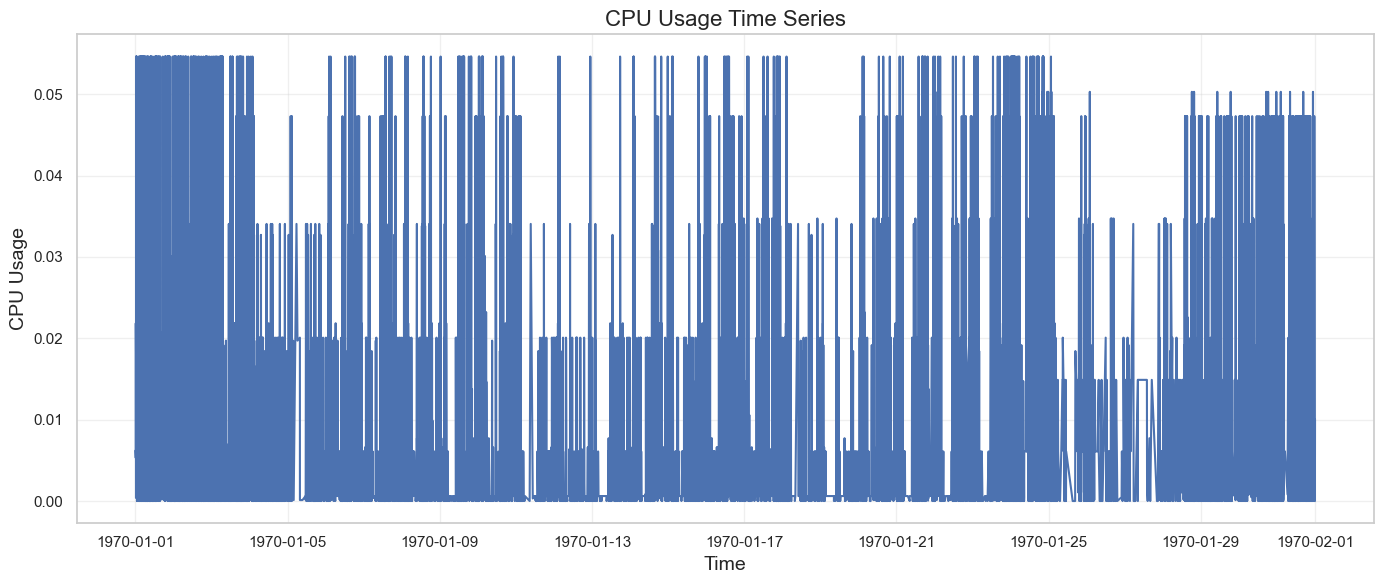

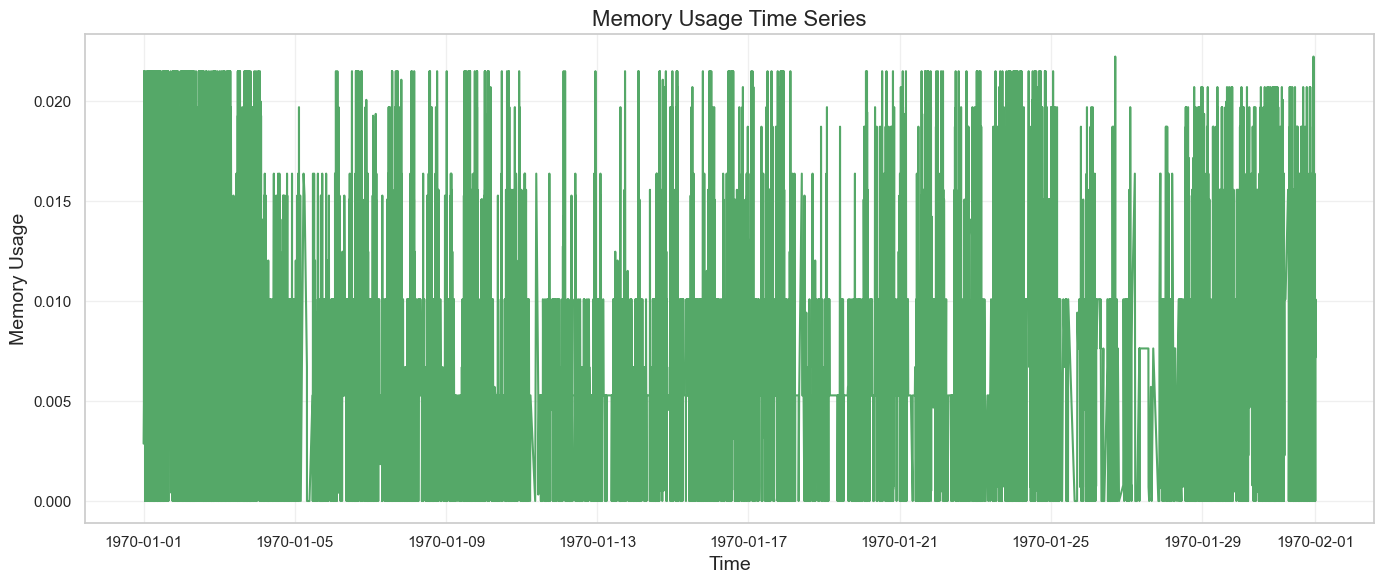

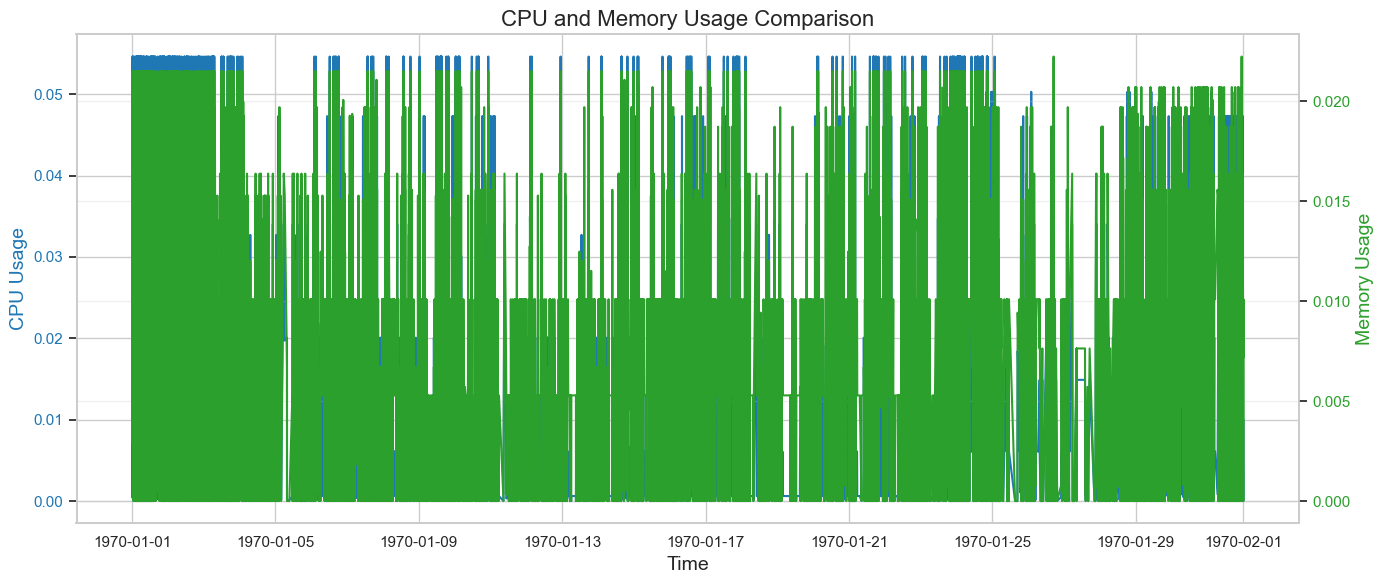

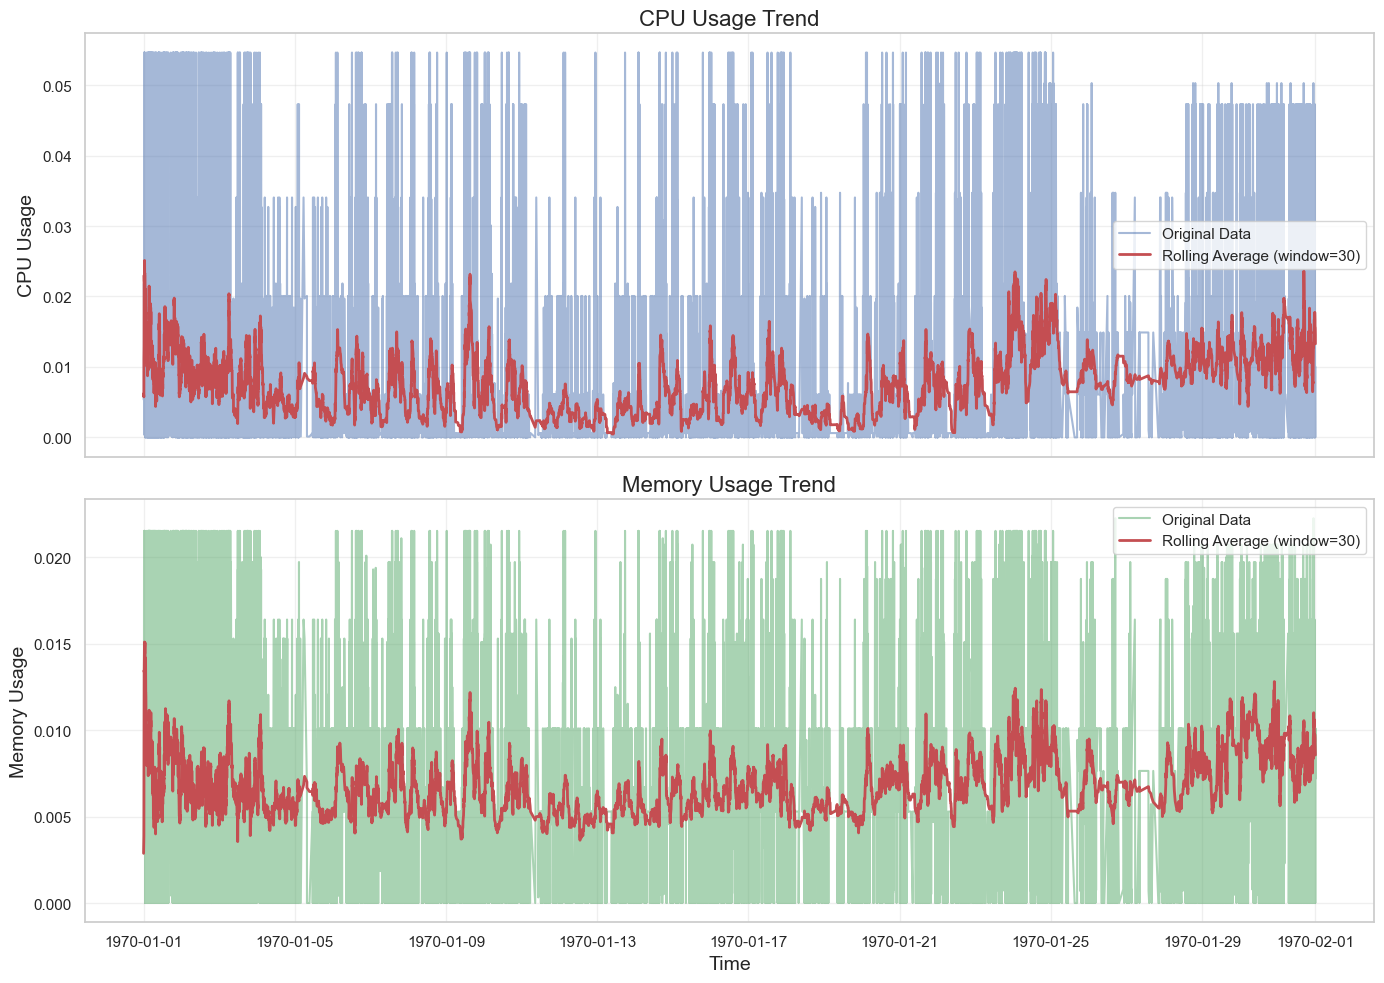


CPU Usage Statistics:
count    12926.000000
mean         0.008636
std          0.013016
min          0.000000
25%          0.000611
50%          0.001181
75%          0.011505
max          0.054626
Name: average_usage_cpu, dtype: float64

Memory Usage Statistics:
count    12926.000000
mean         0.007125
std          0.005669
min          0.000000
25%          0.004677
50%          0.005287
75%          0.010101
max          0.022247
Name: average_usage_memory, dtype: float64


In [84]:
if data_files:
    process_and_visualize_file(data_files[0])
else:
    print("No data files found, please check the directory path")

## Process Multiple Files (if needed)

In [85]:
# Process and visualize all files (optional)
def process_all_files():
    """Process all files in the directory"""
    for i, file_path in enumerate(data_files):
        print(f"\nProcessing file {i+1}/{len(data_files)}: {os.path.basename(file_path)}")
        response = input(f"Process this file? (y/n)")
        if response.lower() == 'y':
            process_and_visualize_file(file_path)
        else:
            print("Skipping this file")

# Uncomment below to process all files
# process_all_files()

## Advanced Analysis: Resource Usage Patterns

In [86]:
def analyze_resource_patterns(df, time_col='time_dt', cpu_col='average_usage_cpu', memory_col='average_usage_memory'):
    """Analyze resource usage patterns and periodicity"""
    # Ensure columns exist
    required_cols = [time_col, cpu_col, memory_col]
    missing_cols = [col for col in required_cols if col not in df.columns]
    if missing_cols:
        print(f"Error: Missing columns: {missing_cols}")
        return
    
    # Ensure time column is datetime type
    if not pd.api.types.is_datetime64_any_dtype(df[time_col]):
        try:
            df[time_col] = pd.to_datetime(df[time_col])
        except:
            print(f"Warning: Unable to convert {time_col} to datetime type")
            return
    
    # Sort by time
    df_sorted = df.sort_values(by=time_col).copy()
    
    # Extract time features
    df_sorted['hour'] = df_sorted[time_col].dt.hour
    df_sorted['day_of_week'] = df_sorted[time_col].dt.dayofweek
    df_sorted['is_weekend'] = df_sorted['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
    
    # 1. Analyze resource usage by hour
    hourly_stats = df_sorted.groupby('hour').agg({
        cpu_col: ['mean', 'std', 'min', 'max'],
        memory_col: ['mean', 'std', 'min', 'max']
    })
    
    # Plot average usage by hour
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
    
    # CPU hourly distribution
    ax1.plot(hourly_stats.index, hourly_stats[cpu_col]['mean'], 'bo-', linewidth=2)
    ax1.fill_between(hourly_stats.index, 
                     hourly_stats[cpu_col]['mean'] - hourly_stats[cpu_col]['std'], 
                     hourly_stats[cpu_col]['mean'] + hourly_stats[cpu_col]['std'], 
                     alpha=0.3, color='blue')
    ax1.set_title('CPU Usage Hourly Distribution', fontsize=16)
    ax1.set_ylabel('Average CPU Usage', fontsize=14)
    ax1.grid(True, alpha=0.3)
    
    # Memory Hourly Distribution
    ax2.plot(hourly_stats.index, hourly_stats[memory_col]['mean'], 'go-', linewidth=2)
    ax2.fill_between(hourly_stats.index, 
                     hourly_stats[memory_col]['mean'] - hourly_stats[memory_col]['std'], 
                     hourly_stats[memory_col]['mean'] + hourly_stats[memory_col]['std'], 
                     alpha=0.3, color='green')
    ax2.set_title('Memory Usage Hourly Distribution', fontsize=16)
    ax2.set_xlabel('Hour', fontsize=14)
    ax2.set_ylabel('Average Memory Usage', fontsize=14)
    ax2.set_xticks(range(0, 24))
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    #plt.savefig('hourly_resource_patterns.png', dpi=300)
    plt.show()
    
    # 2. Weekday vs Weekend Analysis
    day_type_stats = df_sorted.groupby('is_weekend').agg({
        cpu_col: ['mean', 'std', 'min', 'max', 'count'],
        memory_col: ['mean', 'std', 'min', 'max']
    })
    
    # Create Weekday vs Weekend Comparison Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # CPU Weekday vs Weekend
    labels = ['Weekday', 'Weekend']
    ax1.bar(labels, day_type_stats[cpu_col]['mean'], yerr=day_type_stats[cpu_col]['std'], capsize=10, color='blue', alpha=0.7)
    ax1.set_title('Weekday vs Weekend CPU Usage', fontsize=16)
    ax1.set_ylabel('Average CPU Usage', fontsize=14)
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Memory Weekday vs Weekend
    ax2.bar(labels, day_type_stats[memory_col]['mean'], yerr=day_type_stats[memory_col]['std'], capsize=10, color='green', alpha=0.7)
    ax2.set_title('Weekday vs Weekend Memory Usage', fontsize=16)
    ax2.set_ylabel('Average Memory Usage', fontsize=14)
    ax2.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    #plt.savefig('weekday_weekend_comparison.png', dpi=300)
    plt.show()
    
    # 3. CPU and Memory Correlation Analysis
    correlation = df_sorted[[cpu_col, memory_col]].corr().iloc[0, 1]
    
    plt.figure(figsize=(10, 8))
    plt.scatter(df_sorted[cpu_col], df_sorted[memory_col], alpha=0.5)
    plt.title(f'CPU and Memory Usage Correlation (r = {correlation:.4f})', fontsize=16)
    plt.xlabel('CPU Usage', fontsize=14)
    plt.ylabel('Memory Usage', fontsize=14)
    plt.grid(True, alpha=0.3)
    
    # Add Regression Line
    z = np.polyfit(df_sorted[cpu_col], df_sorted[memory_col], 1)
    p = np.poly1d(z)
    plt.plot(df_sorted[cpu_col], p(df_sorted[cpu_col]), "r--", linewidth=2)
    
    plt.tight_layout()
    #plt.savefig('cpu_memory_correlation.png', dpi=300)
    plt.show()
    
    # 4. Resource Usage Distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # CPU Usage Distribution
    sns.histplot(df_sorted[cpu_col], kde=True, ax=ax1, color='blue', alpha=0.7)
    ax1.set_title('CPU Usage Distribution', fontsize=16)
    ax1.set_xlabel('CPU Usage', fontsize=14)
    ax1.grid(True, alpha=0.3)
    
    # Memory Usage Distribution
    sns.histplot(df_sorted[memory_col], kde=True, ax=ax2, color='green', alpha=0.7)
    ax2.set_title('Memory Usage Distribution', fontsize=16)
    ax2.set_xlabel('Memory Usage', fontsize=14)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    #plt.savefig('resource_usage_distribution.png', dpi=300)
    plt.show()
    
    # Print statistical summary
    print("\nResource Usage Pattern Analysis Summary:")
    print(f"CPU and Memory Usage Correlation: {correlation:.4f}")
    print("\nAverage CPU Usage by Hour:")
    print(hourly_stats[cpu_col]['mean'])
    print("\nWeekday vs Weekend Resource Usage:")
    print(day_type_stats)

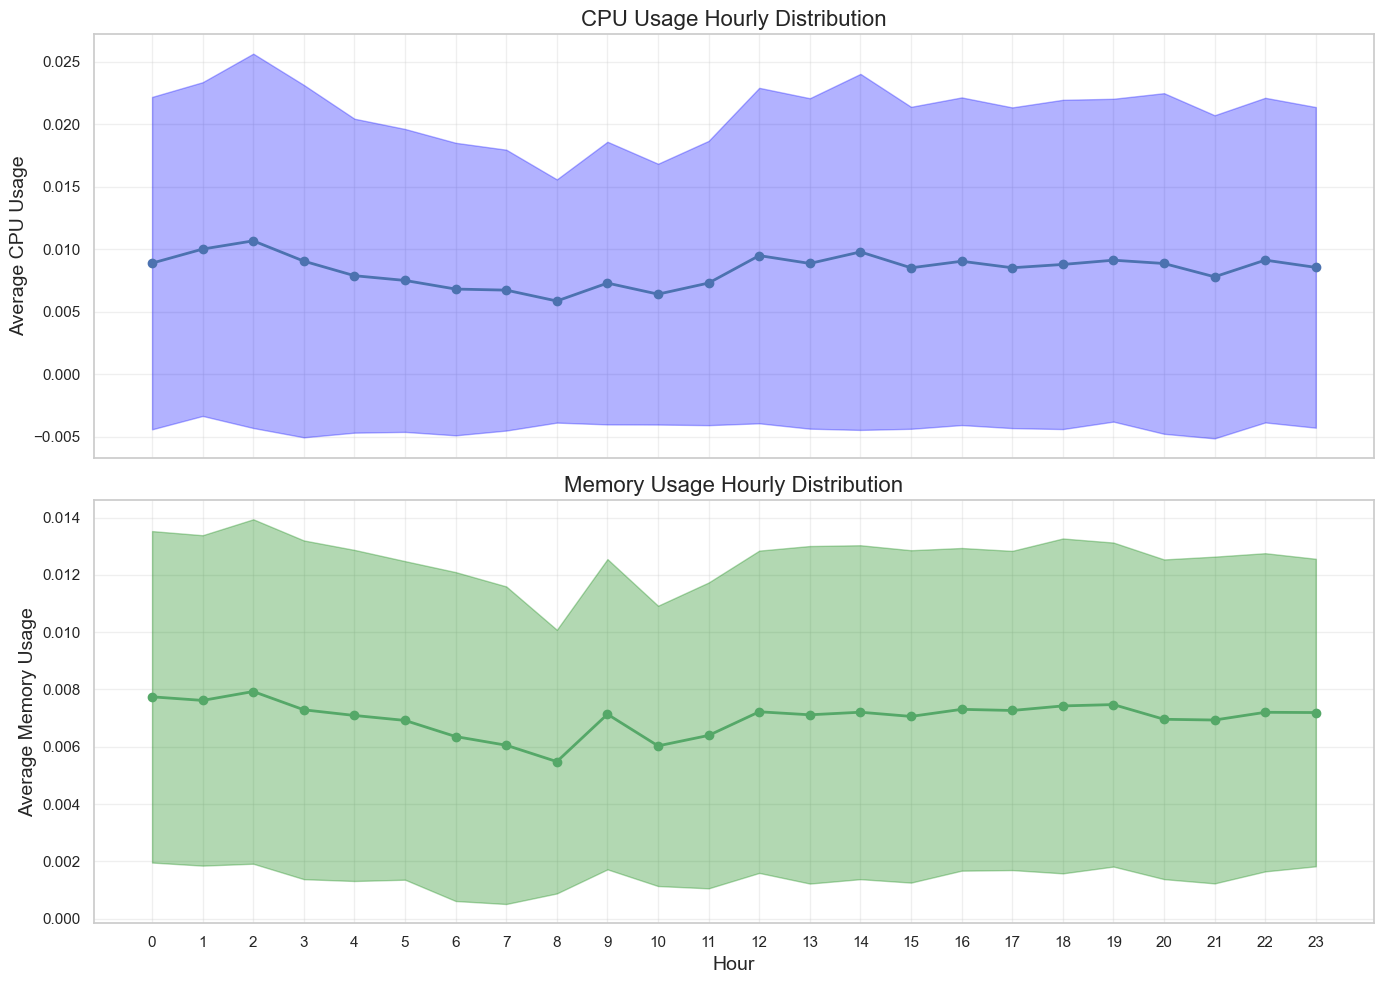

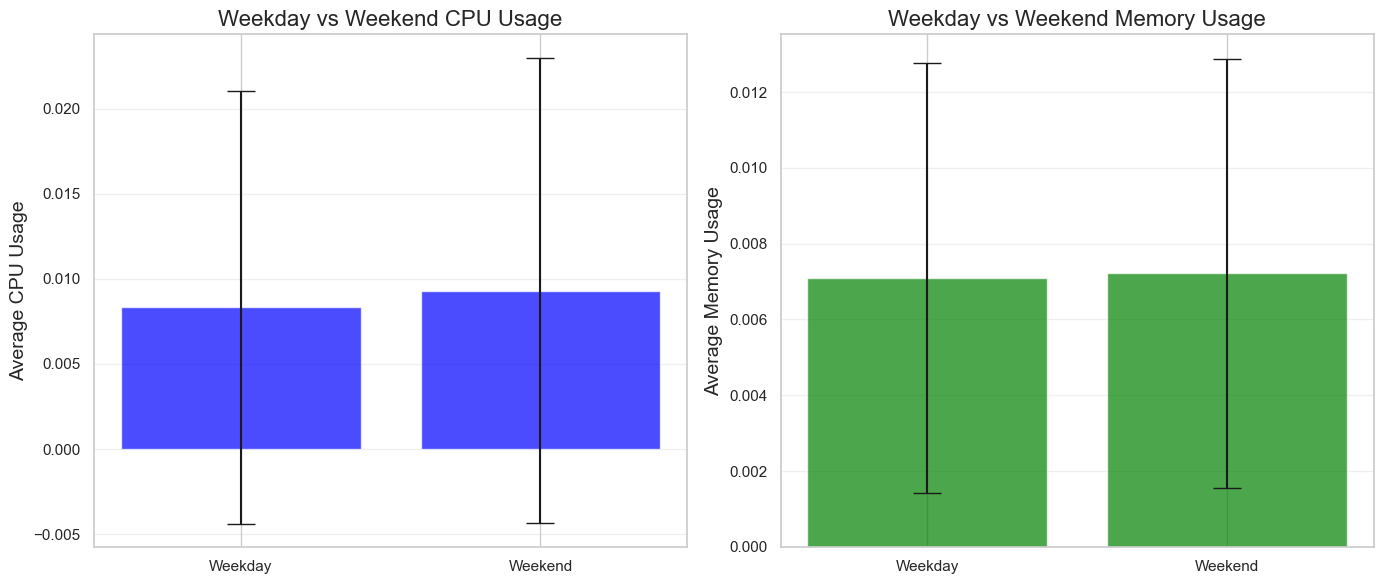

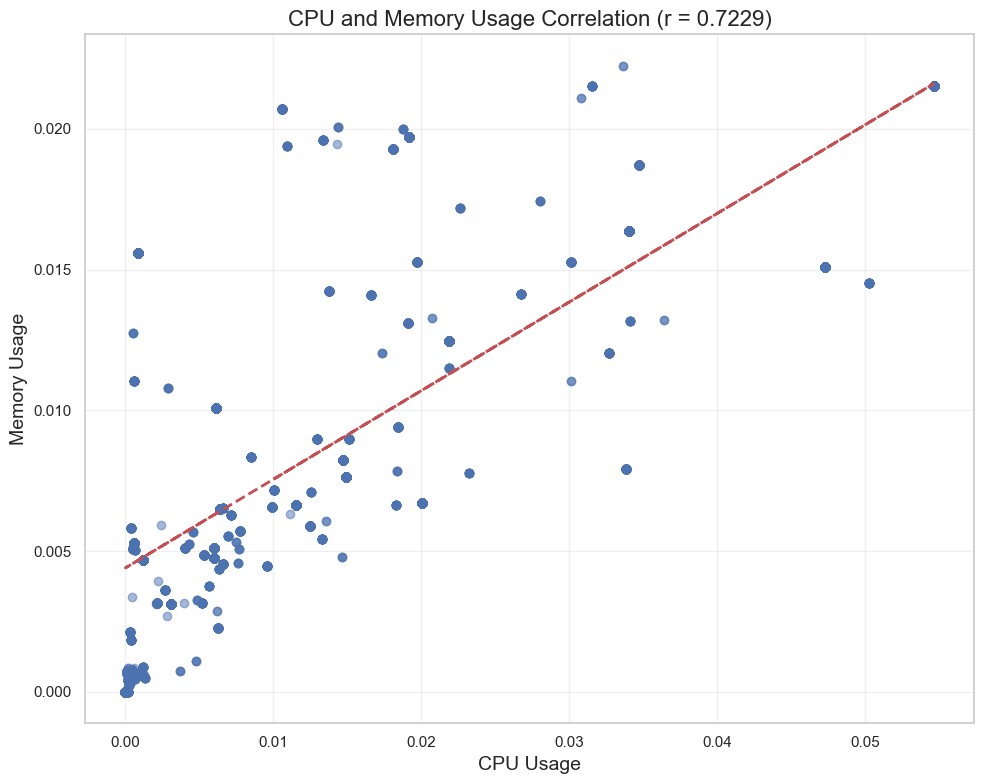

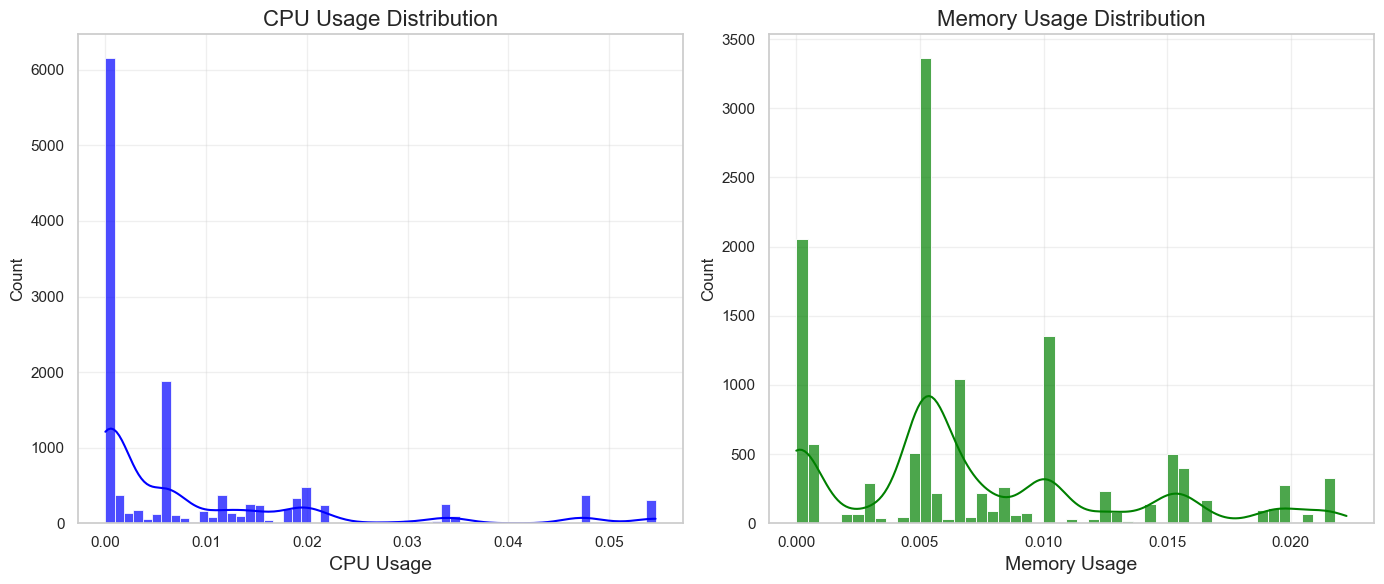


Resource Usage Pattern Analysis Summary:
CPU and Memory Usage Correlation: 0.7229

Average CPU Usage by Hour:
hour
0     0.008893
1     0.010019
2     0.010678
3     0.009052
4     0.007887
5     0.007508
6     0.006818
7     0.006732
8     0.005862
9     0.007296
10    0.006411
11    0.007302
12    0.009498
13    0.008868
14    0.009792
15    0.008518
16    0.009044
17    0.008523
18    0.008788
19    0.009128
20    0.008865
21    0.007798
22    0.009135
23    0.008553
Name: mean, dtype: float64

Weekday vs Weekend Resource Usage:
           average_usage_cpu                                 \
                        mean       std  min       max count   
is_weekend                                                    
0                   0.008322  0.012689  0.0  0.054626  8834   
1                   0.009314  0.013674  0.0  0.054626  4092   

           average_usage_memory                           
                           mean       std  min       max  
is_weekend                 

In [87]:
# Perform deeper pattern analysis on the first file
if data_files:
    try:
        df = pd.read_csv(data_files[0])
        
        # Determine column names
        time_col = None
        cpu_col = None
        memory_col = None
        
        # Find time column
        time_candidates = [col for col in df.columns if 'time' in col.lower() and 'dt' in col.lower()]
        if time_candidates:
            time_col = time_candidates[0]
            # Ensure conversion to datetime type
            df[time_col] = pd.to_datetime(df[time_col])
        
        # Find CPU and memory columns
        if 'average_usage_cpu' in df.columns:
            cpu_col = 'average_usage_cpu'
        if 'average_usage_memory' in df.columns:
            memory_col = 'average_usage_memory'
        
        if time_col and cpu_col and memory_col:
            analyze_resource_patterns(df, time_col=time_col, cpu_col=cpu_col, memory_col=memory_col)
        else:
            print("Missing required columns, cannot perform pattern analysis")
            
    except Exception as e:
        print(f"Error analyzing resource patterns: {e}")